In [1]:
import pandas as pd
#pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("../data/dataset2.csv", index_col=0)

In [3]:
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,City,Open Data Channel Type,Park Borough,Latitude,Longitude
0,27933543,04/28/2014 02:28:38 PM,04/29/2014 10:20:57 AM,DOF,Adjudication - Hearing by Mail,DOF Parking - Request Status,Status of Hearing,NaN,PHONE,Unspecified,NaN,NaN
1,27937032,04/29/2014 01:08:53 PM,04/30/2014 11:54:35 AM,DOF,Property Exec Office,DOF Property - Owner Issue,Billing Address Incorrect,BRONX,PHONE,BRONX,NaN,NaN
2,40265884,09/13/2018 01:06:20 PM,NaN,DSNY,Department of Sanitation,Graffiti,Graffiti,NaN,UNKNOWN,BRONX,NaN,NaN
3,36221306,05/18/2017 11:28:50 AM,06/23/2017 12:00:00 AM,DSNY,Department of Sanitation,Graffiti,Graffiti,NEW YORK,UNKNOWN,MANHATTAN,40.779099,-73.95462
4,27946667,04/30/2014 03:00:27 PM,05/01/2014 10:48:35 AM,DOF,Condo or CoOp Unit,DOF Property - Reduction Issue,Condo or Co-op Abatement,NEW YORK,PHONE,MANHATTAN,NaN,NaN


In [4]:
data.shape

(32412203, 12)

In [5]:
#data.sort_values(by='Created Date')

In [6]:
# data['Created Date'] = pd.to_datetime(data['Created Date'])

# year = 2016
# data_filtered = data[data['Created Date'].dt.year == year]

In [7]:
# data_filtered

In [8]:
call_per_agency = data.groupby(['Agency'])['Unique Key'].count().sort_values(ascending=False)
call_per_agency

Agency
NYPD     9420421
HPD      7758920
DOT      3766820
DSNY     3742524
DEP      2235388
DOB      1482859
DPR      1350701
DOHMH     798800
DOF       511021
TLC       332672
DHS       307399
DCA       277487
HRA       113953
DFTA       95302
EDC        82835
OSE        70955
DOE        23184
3-1-1      20594
NYCEM       8789
DOITT       7438
DCAS        1873
ACS         1220
TAX          461
OTI          195
DVS          123
DCP           89
DORIS         67
FDNY          61
TAT           22
COIB          20
CEO            5
MOC            3
OMB            2
Name: Unique Key, dtype: int64

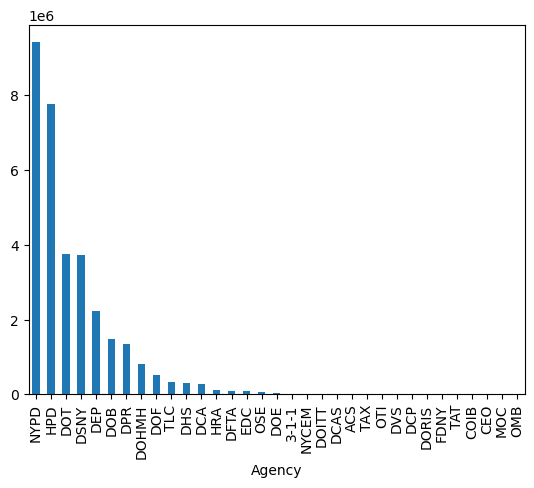

In [9]:
call_per_agency.plot.bar()
plt.show()

In [10]:
data['Park Borough'].unique()

array(['Unspecified', 'BRONX', 'MANHATTAN', 'QUEENS', 'BROOKLYN',
       'STATEN ISLAND', nan], dtype=object)

In [11]:
data['City'].unique()

array([nan, 'BRONX', 'NEW YORK', ..., 'RADIO CITY STATION',
       'NORTH PLAINFIELD', 'MENTOR'], dtype=object)

In [12]:
data['Open Data Channel Type'].unique()

array(['PHONE', 'UNKNOWN', 'ONLINE', 'OTHER', 'MOBILE'], dtype=object)

In [13]:
data['Descriptor'].nunique()

1878

In [14]:
data['Complaint Type'].unique()

array(['DOF Parking - Request Status', 'DOF Property - Owner Issue',
       'Graffiti', 'DOF Property - Reduction Issue', 'Street Condition',
       'DOF Parking - Payment Issue', 'Sanitation Condition',
       'Derelict Vehicles', 'DOF Parking - Request Copy',
       'Dirty Conditions', 'Sewer', 'DOF Property - Request Copy',
       'New Tree Request', 'Water Conservation',
       'DOF Property - Payment Issue', 'Hazardous Materials',
       'Overflowing Litter Baskets', 'Vacant Lot', 'Derelict Bicycle',
       'Other Enforcement', 'Litter Basket / Request',
       'Street Sign - Damaged', 'Traffic Signal Condition', 'Air Quality',
       'SCRIE', 'Water System', 'Maintenance or Facility', 'Asbestos',
       'Animal in a Park', 'Dead/Dying Tree',
       'DOF Property - Update Account', 'Sweeping/Missed-Inadequate',
       'Snow', 'Sweeping/Inadequate', 'Street Light Condition',
       'Request Large Bulky Item Collection', 'OEM Literature Request',
       'Missed Collection (All Mater

In [15]:
call_per_complaint=data.groupby(['Complaint Type'])['Unique Key'].count().sort_values(ascending=False)
call_per_complaint

Complaint Type
Noise - Residential               2998582
HEAT/HOT WATER                    1928512
Illegal Parking                   1905790
Blocked Driveway                  1371218
Street Condition                  1182850
                                   ...   
Misc. Comments'(select*from...          1
Misc. Comments');declare @q...          1
Misc. Comments')waitfor del...          1
Misc. Comments'+(function()...          1
{!xmlparser v='&lt;!DOCTYPE...          1
Name: Unique Key, Length: 484, dtype: int64

In [16]:
call_per_complaint = call_per_complaint[call_per_complaint > 1]


In [17]:
data = data.groupby('Complaint Type').filter(lambda x: x['Unique Key'].count() > 1)

In [18]:
data.shape

(32412078, 12)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32412078 entries, 0 to 32415144
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unique Key              int64  
 1   Created Date            object 
 2   Closed Date             object 
 3   Agency                  object 
 4   Agency Name             object 
 5   Complaint Type          object 
 6   Descriptor              object 
 7   City                    object 
 8   Open Data Channel Type  object 
 9   Park Borough            object 
 10  Latitude                float64
 11  Longitude               float64
dtypes: float64(2), int64(1), object(9)
memory usage: 3.1+ GB


In [20]:
data.dtypes

Unique Key                  int64
Created Date               object
Closed Date                object
Agency                     object
Agency Name                object
Complaint Type             object
Descriptor                 object
City                       object
Open Data Channel Type     object
Park Borough               object
Latitude                  float64
Longitude                 float64
dtype: object

In [21]:
data.isna().sum()

Unique Key                      0
Created Date                    0
Closed Date                896485
Agency                          0
Agency Name                     0
Complaint Type                  0
Descriptor                 544101
City                      1911825
Open Data Channel Type          0
Park Borough                47272
Latitude                  2542265
Longitude                 2542265
dtype: int64

In [22]:
data['Created Date'] = pd.to_datetime(data['Created Date'], errors='coerce')
data['Closed Date'] = pd.to_datetime(data['Closed Date'], errors='coerce')


KeyboardInterrupt: 

In [ ]:
data.head()

In [ ]:
data['diff'] = data['Closed Date'] - data['Created Date']

In [ ]:
data.shape

In [ ]:
data = data[data['Park Borough']!='Unspecified']


In [ ]:
data.shape

In [ ]:
data = data[data['Closed Date'].notnull()]
data = data[data['Latitude'].notnull()]
data = data[data['Park Borough'].notnull()]




In [ ]:
data.shape

In [ ]:
data.isna().sum()

In [ ]:
data = data[data['City'].notnull()]



In [ ]:
data=data.drop(['Descriptor'], axis=1)

In [ ]:
data.shape

In [ ]:
data[data['Park Borough'].isna()]['Complaint Type']


In [ ]:
data[data['Agency Name'] == 'New York City Police Department']['Complaint Type'].value_counts()


In [ ]:
data[data['Agency Name'] == 'New York City Police Department']['Park Borough'].value_counts()



In [ ]:
def upper_case(x):
    return x.upper()

In [ ]:
data['Complaint Type'] = data['Complaint Type'].apply(upper_case)


In [ ]:
data[data['Agency Name'] == 'Department of Housing Preservation and Development']['Complaint Type'].value_counts()



In [ ]:
data[data['Agency Name'] == 'Department of Transportation']['Complaint Type'].value_counts()



In [ ]:
#data.to_csv('dataset2_clean.csv')

In [ ]:
data.shape

In [ ]:
data.isna().sum()


In [ ]:
agency = pd.pivot_table(data, values='Complaint Type', index=['Agency'], aggfunc='count').sort_values(by='Complaint Type', ascending=False)
agency

In [ ]:
agency.reset_index()

In [ ]:
data=data[data['Agency']!='DOF']
data=data[data['Agency']!='DOITT']
data=data[data['Agency']!='DFTA']
data=data[data['Agency']!='OTI']
data=data[data['Agency']!='NYCEM']
data=data[data['Agency']!='HRA']

In [ ]:
data.shape

In [ ]:
n_complaint = pd.pivot_table(data, values='Complaint Type', index=['Agency Name'], aggfunc='count').sort_values(by='Complaint Type', ascending=False)
n_complaint

In [ ]:
filter1 = n_complaint[n_complaint['Complaint Type']<=10000]
filter1.reset_index
filter1.index


In [ ]:
keep_list = ['New York City Police Department',
       'Department of Housing Preservation and Development',
       'Department of Transportation', 'Department of Sanitation',
       'Department of Environmental Protection', 'Department of Buildings',
       'Department of Parks and Recreation',
       'Department of Health and Mental Hygiene',
       'Taxi and Limousine Commission', 'Department of Consumer Affairs',
       'Department of Homeless Services', 'Correspondence Unit',
       'Department for the Aging',
       'Senior Citizen Rent Increase Exemption Unit',
       'Operations Unit - Department of Homeless Services',
       'DHS Advantage Programs', 'Mayorâs Office of Special Enforcement',
       'Personal Exemption Unit', 'Property Exec Office',
       'Economic Development Corporation', 'DOB Inspections - Queens',
       'Refunds and Adjustments', 'Land Records', '3-1-1 Call Center',
       'Exemption Unit', 'Condo or CoOp Unit', 'Accounts Examination']


In [ ]:
#data[data['Agency Name'].isin(keep_list)]



In [ ]:
data.shape